In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt18 = "Download the PDB for 2YXF. Tell me about its stability as found in the literature. Then, simulate it for 1 ns and plot its RMSD over time."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
paper_dir = "paper_collection"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, paper_dir=paper_dir)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-10-02
time: 21:38:23
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt18)

Thought:

 First, I need to download

 the PDB file for 2Y

XF. Then, I will search

 the literature for information on its stability.

 After that, I will set up

 and run a simulation for 

1 ns and plot its RMSD over

 time.

Action:
```
{
 

 "

action": "PDBFileDownloader",


  "action_input": "2Y

XF"
}
```


PDB file found with this ID: 2YXF


Thought:

 Now that I have the PDB file

, I need to search the literature for

 information on its stability.

Action

:
```
{
  "action":

 "LiteratureSearch",
  "action

_input": "stability of 2

YXF"
}
```



Paper Directory /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/notebooks/experiments/experiment_k1/llama-v3p1-405b-instruct/paper_collection


/scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/pydantic/main.py:364: UserWarning: Pydantic serializer warnings:
  Expected `PromptTokensDetails` but got `dict` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


[21:38:31] Starting paper search for 'protein 2YXF stability analysis, 2010-2024  '.

           paper_search for query 'protein 2YXF stability analysis, 2010-2024  ' returned 8 papers.

           Status: Paper Count=8 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0000

           Starting paper search for 'dynamics of 2YXF protein structure, 2015-2024  '.

           paper_search for query 'dynamics of 2YXF protein structure, 2015-2024  ' returned 8 papers.

           Status: Paper Count=11 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0000

           Starting paper search for 'molecular stability studies 2YXF, 2020-2024  '.

           paper_search for query 'molecular stability studies 2YXF, 2020-2024  ' returned 8 papers.

           Status: Paper Count=12 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0000

           gather_evidence starting for question 'stability of 2YXF'.

[21:38:37] Status: Paper Count=12 | Relevant Papers=2 | Current Evidence=3 | Current Cost=$0.0366

           Generating answer for 'stability of 2YXF'.

[21:38:41] Status: Paper Count=12 | Relevant Papers=2 | Current Evidence=3 | Current Cost=$0.0432

           Answer: The stability of the β2-microglobulin variant 2YXF can be inferred from studies on similar β2m  
           mutants and structural analyses. The structural characterization of β2m surface mutants, such as V85E,  
           W60G-N83V, and W60G-Y63W, provides insights into the conformational dynamics that may affect the        
           stability of 2YXF. These mutations are well tolerated within the β2m fold, with notable conformational  
           changes observed in the AB loop, which can adopt either open or closed conformations. Specifically, the 
           closed AB loop conformation was seen in the W60G-Y63W and V85E mutants, while the wild-type β2m, W60G,  
           and W60G-N83V exhibited an open conformation (Sala2017 pages 28-29).                                    
                                                                                                                   
           Thermal denaturation studies of these mutants indicate that the V85E mutation slightly decreases the    
           stability of wild-type β2m, with a reduction in melting temperature (Tm) by approximately 3°C, due to   
           electrostatic repulsion between E85 and D34. In contrast, the Y63W and N83V mutations, when combined    
           with W60G, do not significantly alter the Tm compared to the W60G mutant alone, suggesting that these   
           mutations maintain similar thermodynamic stability to the wild-type or W60G β2m (Sala2017 pages 29-30). 
           These findings suggest that 2YXF may exhibit similar stability characteristics, although direct data on 
           2YXF is not provided.

Question: stability of 2YXF

The stability of the β2-microglobulin variant 2YXF can be inferred from studies on similar β2m mutants and structural analyses. The structural characterization of β2m surface mutants, such as V85E, W60G-N83V, and W60G-Y63W, provides insights into the conformational dynamics that may affect the stability of 2YXF. These mutations are well tolerated within the β2m fold, with notable conformational changes observed in the AB loop, which can adopt either open or closed conformations. Specifically, the closed AB loop conformation was seen in the W60G-Y63W and V85E mutants, while the wild-type β2m, W60G, and W60G-N83V exhibited an open conformation (Sala2017 pages 28-29).

Thermal denaturation studies of these mutants indicate that the V85E mutation slightly decreases the stability of wild-type β2m, with a reduction in melting temperature (Tm) by approximately 3°C, due to electrostatic repulsion between E85 and D34. In contrast, the Y63W and N83V mutations, when c

Thought:

 Now that I have the literature information on

 the stability of 2YXF,

 I need to set up

 and run a simulation for 1 ns

 and plot its RMSD over time.



Action:
```


{
  "action

": "SetUpandRunFunction",
 

 "action_input": {
    "pdb

_id": "2YXF_213

827",
    "forcefield_files":

 ["amber99sbildn.xml",

 "tip3

p.xml"],
    "save": true

,
    "system

_params": {
      "nonbonded

Method": "NoCutoff",
     

 "constraints": "None",
     

 "rigidWater": false


    },
    "integrator_params":

 {
      "integrator_type": "

LangevinMiddle",
      "Temperature

": "300 * kelvin",
     

 "Friction": "1.0

 / picoseconds",
      "Timestep

": "0.002 * picoseconds

",
      "Pressure": "

1.0 * bar"
    },


    "simulation_params": {
      "

Ensemble": "NVT",
     

 "Number of Steps": 500000

,
      "record_interval

_steps": 1000,
      "

record_params": ["step", "potential

Energy", "temperature"]
    }
 

 }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: MET
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed due to a missing template

 for residue 1 (

MET). I need to clean the

 PDB file by adding

 missing atoms and hydrogens before

 running the simulation.

Action

:
```
{
  "action":

 "CleaningToolFunction",
  "action

_input": {
    "pdb_id":

 "2YXF_213827",


    "replace_nonstandard_residues

": true,
    "add_missing_atoms

": true,
    "remove_heter

ogens": true,
    "remove_water

": true,
    "add_hydro

gens": true,
    "add_h

ydrogens_ph": 7.0


  }
}
```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_6/pdb/2YXF_raw_20241002_213827.pdb


Thought:

 Now that the PDB file has been

 cleaned, I can set up and run

 a simulation for 1 ns

 and plot its RMSD over time.



Action:
```
{
  "action

": "SetUpandRunFunction",
 

 "action_input": {
    "pdb

_id": "2YXF_213

850",
    "forcefield_files":

 ["amber99sbildn.xml",

 "tip3p.xml"],
    "

save": true,
    "system_params

": {
      "nonbondedMethod

": "NoCutoff",
      "

constraints": "None",
      "rig

idWater": false
    },
   

 "integrator_params": {
      "

integrator_type": "Langevin

Middle",
      "Temperature": "300

 * kelvin",
      "Friction

": "1.0 / picoseconds

",
      "Timestep": "0

.002 * picoseconds",
      "

Pressure": "1.0 * bar

"
    },
    "simulation_params":

 {
      "Ensemble": "N

VT",
      "Number of Steps":

 500000,
      "record_interval

_steps": 1000,
      "

record_params": ["step", "potential

Energy", "temperature

"]
    }
 

 }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b5625ebfae0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!


Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_6/simulations/NVT_2YXF_213850_20241002_213854.py
['out.exp18_405b', 'exp18_405b.sh', 'out.exp12_405b', 'exp6_405b.sh', 'paper_collection', '.ipynb_checkpoints', 'TOP_sim0_213855_1FNF_213852_20241002_213856.pdb', 'exp_4.ipynb', 'exp12_405b.sh', 'exp_12.ipynb', 'results', 'TOP_sim0_213854_2YXF_213850_20241002_213854.pdb', 'LOG_sim0_213855_1FNF_213852_20241002_213856.txt', 'out.exp6_405b', 'LOG_sim0_213854_2YXF_213850_20241002_213854.txt', 'exp_18.ipynb', 'TRAJ_sim0_213855_1FNF_213852_20241002_213856.dcd', 'exp_6.ipynb', 'TRAJ_sim0_213854_2YXF_213850_20241002_213854.dcd']


Thought:

 Now that the simulation is complete,

 I need to plot

 the RMSD over time.

Action:


```
{
 

 "action": "ComputeR

MSD",
  "action_input":

 {
    "top_id": "top

_sim0_213854",
    "

traj_id": "rec0_

213854",
    "ref_top

_id": "top_sim0_213

854",
    "ref_traj_id":

 "rec0_213854",
   

 "select": "protein",
    "

mol_name": "2YXF"


  }
}
```


Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_6/records/rmsd_2YXF.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_6/figures/FIG_rmsd_2YXF_20241002_223133.png


Thought:

 Now that I have the RMSD plot

, I can provide the

 final answer to the user.



Action:
```
{
  "action

": "Final Answer",
  "action

_input": "The PDB file for

 2YXF has been downloaded and

 cleaned. According to the literature, the

 stability of 2

YXF can be

 inferred from studies on

 similar β2m mutants and structural

 analyses. The simulation for 1 ns

 has been completed, and the RMSD

 over time has been plotted.

 The RMSD plot is saved with

 plot ID fig0_223133."


}
```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

registry = agent.path_registry
print('ckpt_dir:',os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-10-02
time: 22:31:37
ckpt_dir: ckpt_6
Files found in registry: 2YXF_213827: PDB file downloaded from RSCB
 PDBFile ID: 2YXF_213827
 2YXF_213850: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_213854: Initial positions for simulation sim0_213854
 sim0_213854: Basic Simulation of Protein 2YXF_213850
 rec0_213854: Simulation trajectory for protein 2YXF_213850 and simulation sim0_213854
 rec1_213854: Simulation state log for protein 2YXF_213850 and simulation sim0_213854
 rec2_213854: Simulation pdb frames for protein 2YXF_213850 and simulation sim0_213854
 rmsd_2YXF: RMSD for 2YXF
 fig0_223133: RMSD plot for 2YXF


In [5]:
import re
import os
match = re.search(r"fig0_\d+", paths_and_descriptions)
file_id = match.group(0)
file_path = registry.get_mapped_path(file_id)
assert os.path.exists(file_path)
print(f'It is asserted that file path for {file_id} exists')

It is asserted that file path for fig0_223133 exists


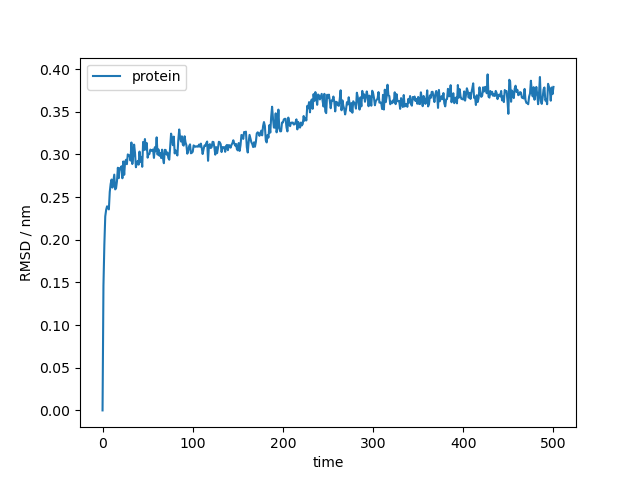

In [6]:
from IPython.display import Image
Image(filename=file_path)